In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/NCCO2R/NC-Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape 

(477, 22)

In [3]:
X = pd.read_excel(AA, usecols='A:P') 
Y=pd.read_excel(AA, usecols='R')


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,Y.values.ravel(), test_size=0.2, random_state=42)
X.shape
X.head(5)

,Quantum dot,Grahpene,Carbon,CNT,Mesoporous Carbon,Carbon Foam,Pyridinic-N,Pyrrolic-N,Grapitic-N,Quaternary-N,N-Oxide,S,Synthesis Temp,HCO3-,KOH,Potential
0,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.40
1,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.50
2,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.56
3,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.60
4,0.0,0.0,0.0,0.0,0.93,0.0,0.026,0.028,0.016,0.0,0.0,0.0,973,0.1,0,-0.70


In [5]:
Y.head(5)

,CO
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.666667


In [6]:
import seaborn as sns

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

# Example data split (replace with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, Y.values.ravel(), test_size=0.2, random_state=22)

# Feature selection using a simple model (RandomForest)
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=22))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Define Gradient Boosting Regressor for stacking
gbr = GradientBoostingRegressor(n_estimators=200, random_state=22)

# Define the base model
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=22)),
    ('gbr', gbr),
]

# Meta-model (linear regression)
meta_model = LinearRegression()

# Stacking Regressor with base models and meta-model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Define the parameter grid for tuning the Gradient Boosting Regressor
param_grid = {
    'gbr__n_estimators': [100, 200, 500],  # Trying lower estimators
    'gbr__learning_rate': [0.01, 0.05, 0.1],
    'gbr__max_depth': [2, 3, 4],  # Trying smaller max depths to reduce overfitting
    'gbr__min_samples_split': [3, 5, 10],
    'gbr__min_samples_leaf': [2, 3, 5],
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(stacked_model, param_grid, cv=KFold(10, shuffle=True, random_state=22), n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV for the best hyperparameters
grid_search.fit(X_train_selected, y_train)

# Retrieve the best model and hyperparameters
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Evaluate performance on the training set with the best model
y_train_pred_best = best_model.predict(X_train_selected)
train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
train_r2_best = r2_score(y_train, y_train_pred_best)
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)

# Print performance metrics for the training set with the best model
print(f"Best Model Training RMSE: {train_rmse_best}")
print(f"Best Model Training R²: {train_r2_best}")
print(f"Best Model Training MAE: {train_mae_best}")

# Evaluate performance on the test set with the best model
y_test_pred_best = best_model.predict(X_test_selected)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
test_r2_best = r2_score(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

# Print performance metrics for the test set with the best model
print(f"Best Model Test RMSE: {test_rmse_best}")
print(f"Best Model Test R²: {test_r2_best}")
print(f"Best Model Test MAE: {test_mae_best}")


Fitting 10 folds for each of 243 candidates, totalling 2430 fits


C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'gbr__learning_rate': 0.1, 'gbr__max_depth': 4, 'gbr__min_samples_leaf': 2, 'gbr__min_samples_split': 5, 'gbr__n_estimators': 500}
Best Model Training RMSE: 2.390958041244131
Best Model Training R²: 0.9916396370724159
Best Model Training MAE: 1.8444924083096519
Best Model Test RMSE: 7.6660808762000805
Best Model Test R²: 0.9051090254689165
Best Model Test MAE: 4.857022794500384


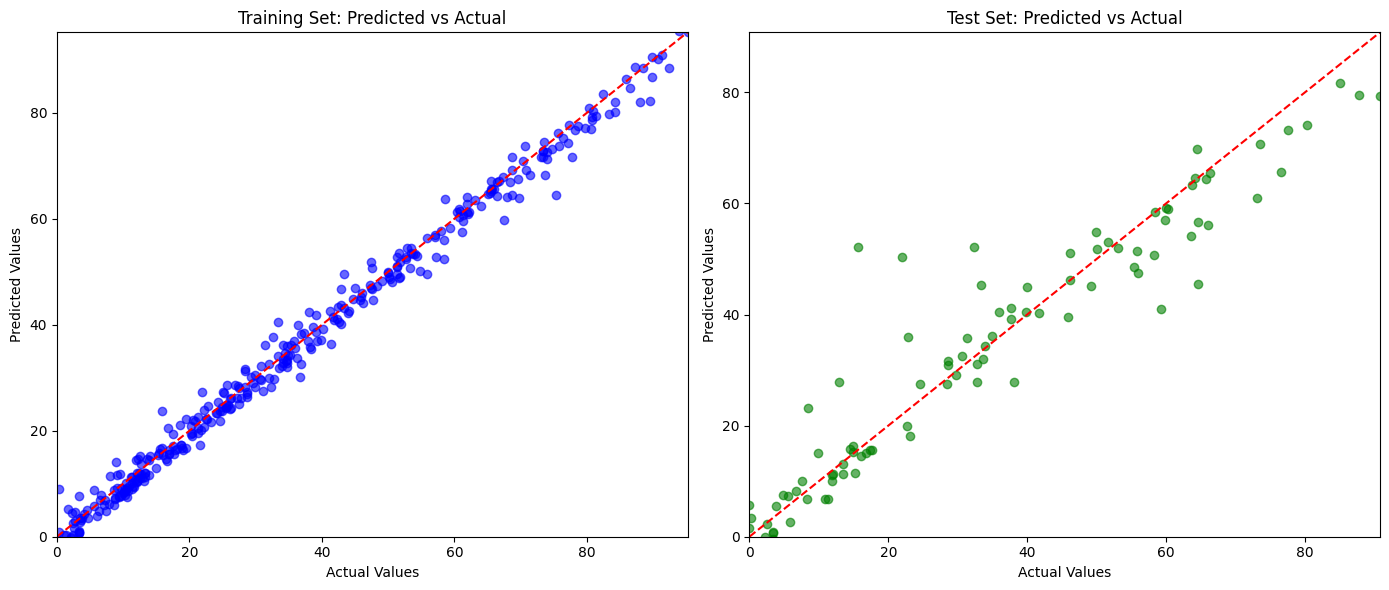

In [16]:
import matplotlib.pyplot as plt

# Scatter plot for training set predictions
plt.figure(figsize=(14, 6))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_best, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_train.min(), y_train.max()])
plt.ylim([y_train.min(), y_train.max()])

# Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Test Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

plt.tight_layout()
plt.show()


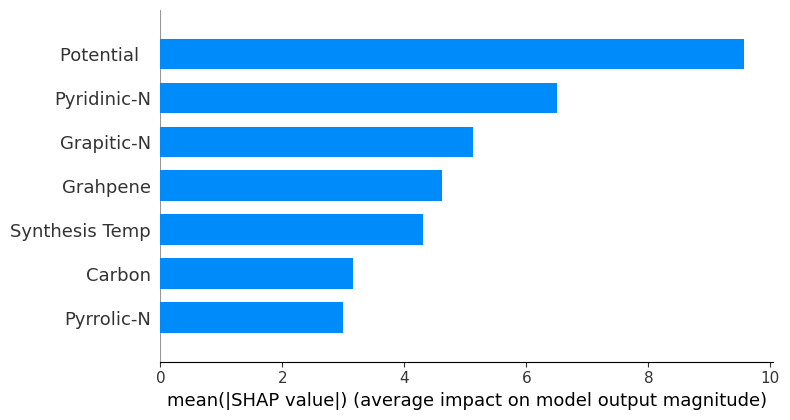

In [22]:
import shap
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(best_model.named_estimators_['gbr'])
shap_values_gb = explainer.shap_values(X_test_selected)

# Plot the SHAP summary
shap.summary_plot(shap_values_gb, X_test_selected, feature_names=X.columns[selector.get_support()], plot_type="bar")

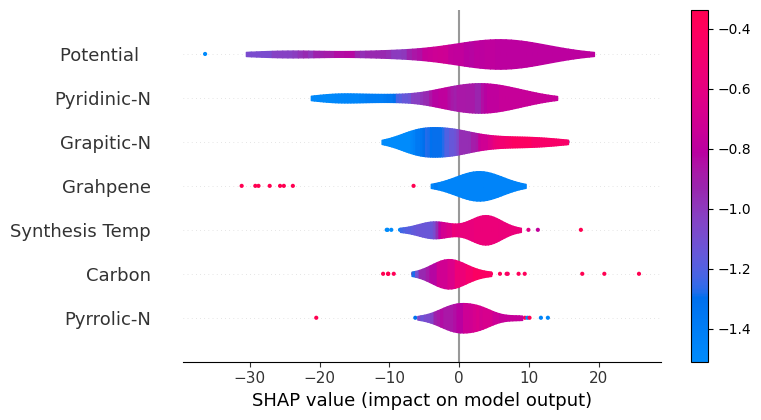

In [23]:
shap.summary_plot(shap_values_gb, X_test_selected, feature_names=X.columns[selector.get_support()], show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()